In [175]:
%%capture
%pip install scipy numpy pandas matplotlib seaborn

In [176]:
from scipy.io import loadmat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Atividade 1
No arquivo “Atividade 1.mat”1 da Aula 06 (ver Moodle) você encontrará uma matriz
“dados” com 4 linhas e 200 colunas. Cada linha corresponde a uma medida de velocidade
de condução nervosa (em m/s) que foi coletada em um grupo de 200 indivíduos saudáveis.
Reduções significativas nessas velocidades de condução podem estar associadas a
diferentes condições patológicas, como doenças desmielinizantes, neurodegenerativas ou
como a síndrome do túnel do carpo. Esta condição consiste no estreitamento da região do
pulso por onde passa o nervo mediano (ver figura abaixo). Um dos testes diagnósticos
realizados envolve justamente comparar a condução nervosa dos pacientes com os dados
obtidos em indivíduos saudáveis em um exame de eletroneurografia. Conduções nervosas
em indivíduos saudáveis observam distribuições aproximadamente gaussianas e a
comparação de medidas registradas em pacientes com estas distribuições obtidas em
saudáveis podem levar ao diagnóstico da Síndrome.

## Questão A

In [177]:
file = loadmat('../data/pratica_1/Atividade 1.mat')
dados = file.get('dados')

In [178]:
df = pd.DataFrame(
    dados)

In [179]:
df

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,61.204915,60.001655,58.767884,59.386217,57.042551,62.392690,58.732062,62.618375,59.190475,60.549121,...,61.926205,56.728811,55.690916,62.119866,61.207345,60.358510,55.331676,62.075891,57.263870,55.893088
1,49.028340,50.923110,51.311270,50.548781,49.234431,54.147435,48.755121,50.850568,48.677835,51.135987,...,50.893160,52.844065,50.172873,52.262556,52.955016,51.132810,48.723338,50.327604,47.890556,45.522511
2,55.228063,55.780176,55.365634,54.573325,54.395876,56.650404,55.549939,57.302721,56.167608,57.097771,...,54.216216,56.923456,56.603125,54.498523,51.663645,54.901655,53.241012,53.494101,54.359490,52.811328
3,62.786420,59.941466,58.864239,59.684981,57.154436,62.629718,59.185709,61.665962,60.224763,58.373115,...,57.701332,61.817263,61.676921,59.307393,56.996306,59.531800,62.080196,59.386064,60.233529,59.920333


In [180]:
mean = df.mean(axis=1)
variance = df.var(axis=1)

In [181]:
mean

0    58.710804
1    50.093852
2    54.998854
3    59.906225
dtype: float64

In [182]:
variance

0    5.074304
1    4.436445
2    1.974906
3    2.952060
dtype: float64

## Questão B

In [183]:
p = [df.iloc[0], df.iloc[1], df.iloc[2], df.iloc[3]]

<AxesSubplot:xlabel='0', ylabel='Count'>

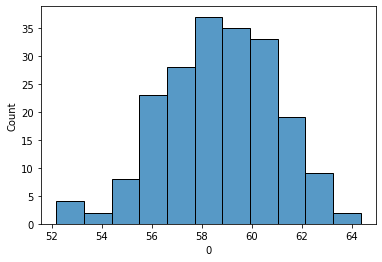

In [184]:
sns.histplot(data=p[0])

In [185]:
df

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,61.204915,60.001655,58.767884,59.386217,57.042551,62.392690,58.732062,62.618375,59.190475,60.549121,...,61.926205,56.728811,55.690916,62.119866,61.207345,60.358510,55.331676,62.075891,57.263870,55.893088
1,49.028340,50.923110,51.311270,50.548781,49.234431,54.147435,48.755121,50.850568,48.677835,51.135987,...,50.893160,52.844065,50.172873,52.262556,52.955016,51.132810,48.723338,50.327604,47.890556,45.522511
2,55.228063,55.780176,55.365634,54.573325,54.395876,56.650404,55.549939,57.302721,56.167608,57.097771,...,54.216216,56.923456,56.603125,54.498523,51.663645,54.901655,53.241012,53.494101,54.359490,52.811328
3,62.786420,59.941466,58.864239,59.684981,57.154436,62.629718,59.185709,61.665962,60.224763,58.373115,...,57.701332,61.817263,61.676921,59.307393,56.996306,59.531800,62.080196,59.386064,60.233529,59.920333


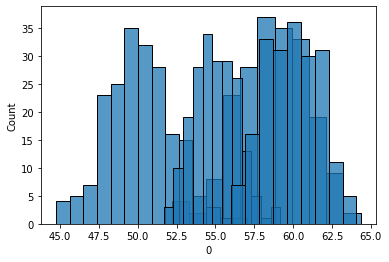

In [186]:
for row in p:
    sns.histplot(data=row, )

In [187]:
shapiro = [
    scipy.stats.shapiro(dado) for dado in dados]

for response in shapiro:
    print(f'stats: {response.statistic} |' + \
        f' pvalue: {response.pvalue}')

stats: 0.9914840459823608 | pvalue: 0.2908915579319
stats: 0.9959108233451843 | pvalue: 0.8722559213638306
stats: 0.9926682114601135 | pvalue: 0.41828590631484985
stats: 0.989329993724823 | pvalue: 0.1423971801996231


O teste e shapiro-Wilk assume que a distribuição dos dados é normal. Os dados retornados pelo teste são:
confiabilidade (stats) e probabilidade de ser normal (p-value). O valor de p é maior que 0.05, logo, os dados podem ser tratados como uma distribuição normal. (Não se deve rejeitar a hipótese nula).

## Questão C

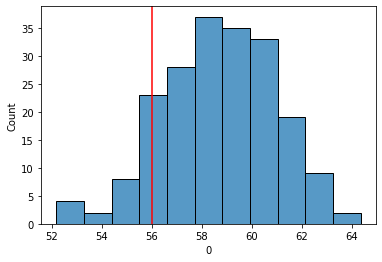

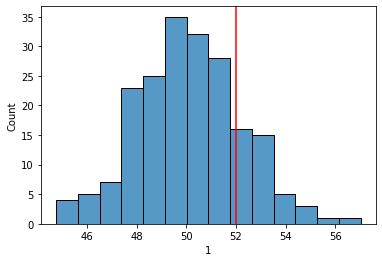

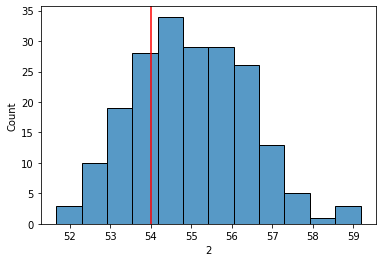

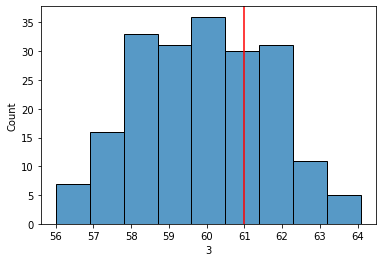

In [188]:
values = [56, 52, 54, 61]
for index, row in enumerate(p):
    plt.figure()
    sns.histplot(data=row )
    plt.axvline(values[index], color='red')


In [189]:
def calcula_distribuicao_normal(df):
    media = df.mean()
    desvio_padrao = df.std()
    return scipy.stats.norm(media, desvio_padrao)


In [190]:
df.iloc[0]

0      61.204915
1      60.001655
2      58.767884
3      59.386217
4      57.042551
         ...    
195    60.358510
196    55.331676
197    62.075891
198    57.263870
199    55.893088
Name: 0, Length: 200, dtype: float64

In [191]:
df[0]
df

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,61.204915,60.001655,58.767884,59.386217,57.042551,62.392690,58.732062,62.618375,59.190475,60.549121,...,61.926205,56.728811,55.690916,62.119866,61.207345,60.358510,55.331676,62.075891,57.263870,55.893088
1,49.028340,50.923110,51.311270,50.548781,49.234431,54.147435,48.755121,50.850568,48.677835,51.135987,...,50.893160,52.844065,50.172873,52.262556,52.955016,51.132810,48.723338,50.327604,47.890556,45.522511
2,55.228063,55.780176,55.365634,54.573325,54.395876,56.650404,55.549939,57.302721,56.167608,57.097771,...,54.216216,56.923456,56.603125,54.498523,51.663645,54.901655,53.241012,53.494101,54.359490,52.811328
3,62.786420,59.941466,58.864239,59.684981,57.154436,62.629718,59.185709,61.665962,60.224763,58.373115,...,57.701332,61.817263,61.676921,59.307393,56.996306,59.531800,62.080196,59.386064,60.233529,59.920333


In [192]:
for index, value in enumerate([56, 52, 54, 61]):
  probabilidade_cumulada = \
    scipy.stats.norm.cdf(
      x=value,
      loc=df.iloc[index].mean(),
      scale=df.std(),
    ).mean()
  print(f'{value}: {probabilidade_cumulada*100:.2f}%')

56: 27.46%
52: 66.39%
54: 41.20%
61: 59.62%


In [193]:
np.cov(df) # matriz de covariância

array([[ 5.0743038 ,  1.23241238,  0.04781499, -0.34548987],
       [ 1.23241238,  4.43644463, -0.13245898,  0.02329615],
       [ 0.04781499, -0.13245898,  1.97490562,  0.83190665],
       [-0.34548987,  0.02329615,  0.83190665,  2.95205989]])

In [194]:
# scipy.stats.multivariate_normal.cdf(
#   x=56,
#   cov=np.cov(df),
# )

---
# <center> Atividade 2: Inferência e Testes Diagnósticos

O arquivo “Atividade 2” da Aula 06 (ver Moodle) contém uma matriz “dados” obtida de
19476 homens com mais de 50 anos e que foram submetidos a testes de câncer de
próstata. Coluna 1: resultado do teste PSA (1 = positivo para a doença, 0 = negativo para a
doença); Coluna 2: resultado do teste de toque retal DRE (1 = positivo para a doença, 0 =
negativo para doença); Coluna 3 = resultado da biópsia (1 = paciente com a doença, 0 =
paciente sem a doença). Estes dados podem ser utilizados para avaliar o potencial clínico
de tais testes na população alvo.

In [195]:
data = loadmat('../data/pratica_1/Atividade 2.mat').get('dados')

In [196]:
data

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       ...,
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 0]], dtype=uint8)

In [197]:
df_data = pd.DataFrame(data, columns=['PSA', 'DRE', 'Biópsia'])
df_data

,PSA,DRE,Biópsia
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
19471,0,0,0
19472,0,0,0
19473,0,1,0
19474,0,1,0


## A. Estime a sensibilidade de ambos os testes, PSA e DRE.

### Análise da questão A
- Sensibilidade P(T = + | D = +)
- Probabilidade do teste ser positivo dado que tem a doença
- Probabilidade = Nº de casos positivos do teste (DRE OU PSA) / Total de resultados positivos da biopsia
- A biopsia é o teste de referência (D = +)
- P(T = + | D = +) = P(T = + , D = +) / P(D = +)

In [198]:
total_biopsia_positiva = df_data[df_data['Biópsia'] == 1].shape[0]

In [199]:
casos_positivos_psa_e_biopsia = df_data[
  (df_data['PSA'] == 1) & (df_data['Biópsia'] == 1)].shape[0]
casos_positivos_dre_e_biopsia = df_data[
  (df_data['DRE'] == 1) & (df_data['Biópsia'] == 1)].shape[0]

In [200]:
sensibilidade_psa = casos_positivos_psa_e_biopsia / total_biopsia_positiva
sensibilidade_dre = casos_positivos_dre_e_biopsia / total_biopsia_positiva
print(f'Sensibilidade PSA: {sensibilidade_psa*100:.2f}%' + \
      f' | Sensibilidade DRE: {sensibilidade_dre*100:.2f}%')

Sensibilidade PSA: 25.57% | Sensibilidade DRE: 17.76%


## B. Estime a especificidade de ambos os testes, PSA e DRE.

### Análise da questão B
- Especificidade P(T = - | D = -)
- Probabilidade do teste dar negativo dado que não tem a doença
- Probabilidade = Nº de casos negativos do teste (DRE OU PSA) / Total de resultados negativos da biopsia
- P(T = - | D = -) = P(T = - , D = -) / P(D = -)

In [201]:
total_biopsia_negativa = df_data[df_data['Biópsia'] == 0].shape[0]

In [202]:
casos_negativos_psa_e_biopsia = df_data[
  (df_data['PSA'] == 0) & (df_data['Biópsia'] == 0)].shape[0]
casos_negativos_dre_e_biopsia = df_data[
  (df_data['DRE'] == 0) & (df_data['Biópsia'] == 0)].shape[0]

In [203]:
especificidade_psa = casos_negativos_psa_e_biopsia / total_biopsia_negativa
especificidade_dre = casos_negativos_dre_e_biopsia / total_biopsia_negativa
print(f'Sensibilidade PSA: {especificidade_psa*100:.2f}%' + \
      f' | Sensibilidade DRE: {especificidade_dre*100:.2f}%')

Sensibilidade PSA: 94.91% | Sensibilidade DRE: 93.50%


## C. Suponha que dados do ministério da saúde indiquem como sendo de 4,2% a prevalência do câncer de próstata em homens com mais de 50 anos. O PSA é medido em um determinado paciente de sexo masculino com mais de 50 anos: se o teste for positivo, qual a probabilidade do paciente estar doente? Repita a mesma análise para o DRE.

### Análise da questão C
- Homens com mais de 50 anos tem 4.2% de chance de ter câncer de próstata
- Se o teste é positivo, a probabilidade do paciente será calculada como:
- Probabilidade de estar doente = Probabilidade do teste ser positivo dado que tem a doença * Probabilidade de ter a doença / Probabilidade do teste ser positivo
<div> P(D = + | T = +) = P(T = + | D = +) * P(D = +) / P(T = +)
<div> P(D = + | T = +) = sensibilidade * P(D = +) / P(T = +)
<div> P(T = +) = P(T = + | D = +) * P(D = +) + P(T = + | D = -) * P(D = -)
<div> P(T = +) = sensibilidade * P(D = +) + (1 - especificidade) * (1 - P(D = +))
<div> P(D = + | T = +) = (sensibilidade * P(D = +)) / (sensibilidade * P(D = +) + (1 - especificidade) * (1 - P(D = +)))
<div> Como P(D = +) = 0.042:
<div> P(D = + | T = +) + (sensibilidade * 0,042) / (sensibilidade * 0,042 + (1 - especificidade) * (1 - 0,042))
<div> P(D = + | T = +) = (sensibilidade * 0,042) / (sensibilidade * 0,042 + (1 - especificidade) * 0,958)


In [204]:
prob_estar_doente_psa = \
  (sensibilidade_psa * 0.042) / (sensibilidade_psa * 0.042 + (1-especificidade_psa) * (1-0.042))
prob_estar_doente_dre = \
  (sensibilidade_dre * 0.042) / (sensibilidade_dre * 0.042 + (1-especificidade_dre) * (1-0.042))

print(f'Probabilidade de estar doente se o teste PSA for positivo: {prob_estar_doente_psa*100:.2f}% \n' + \
      f'Probabilidade de estar doente se o teste DRE for positivo: {prob_estar_doente_dre*100:.2f}%')

Probabilidade de estar doente se o teste PSA for positivo: 18.04% 
Probabilidade de estar doente se o teste DRE for positivo: 10.70%


## D. Analise agora a combinação dos dois testes diagnósticos: qual a probabilidade de câncer se pelo menos um dos testes for positivo? E se ambos os testes forem positivos?

### Análise da questão D
- Se pelo menos um dos testes for positivo, a probabilidade de câncer será calculada como:

<div><center> P(T = +) = P(PSA = +) + P(DRE = +) </div>

- Se ambos precisarem ser positivos, a probabilidade de câncer será calculada como:
<div><center> P(T = +) = P(PSA = +) * P(DRE = +) </div>

- P(D = + | DRE = +, PSA = +)
- P(T = + | DRE = +, PSA = +)*P(D = +| DRE = +, PSA = +) / P(T = + | DRE = +, PSA = +)


P(T = + | DRE = +, PSA = +) = P(T= + | DRE = +) * P(T = + | PSA = +)

In [205]:
df_data

,PSA,DRE,Biópsia
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
19471,0,0,0
19472,0,0,0
19473,0,1,0
19474,0,1,0


In [206]:
casos_positivos_psa_e_dre = df_data[
  (df_data['DRE'] == 1) & (df_data['PSA'] == 1) & (df_data['Biópsia'] == 1)].shape[0]
casos_positivos_psa_ou_dre = df_data[
  ((df_data['DRE'] == 1) | (df_data['PSA'] == 1)) & (df_data['Biópsia'] == 1)].shape[0]
casos_negativos_psa_e_dre = df_data[
  (df_data['DRE'] == 0) & (df_data['PSA'] == 0) & (df_data['Biópsia'] == 0)].shape[0]
casos_negativos_psa_ou_dre = df_data[
  ((df_data['DRE'] == 0) | (df_data['PSA'] == 0)) & (df_data['Biópsia'] == 0)].shape[0]

In [207]:
print(f'Casos positivos PSA: {casos_positivos_psa_e_biopsia} \n' + \
      f'Casos positivos DRE: {casos_positivos_dre_e_biopsia} \n' + \
      f'Casos positivos PSA e DRE: {casos_positivos_psa_e_dre} \n' + \
      f'Casos positivos PSA ou DRE: {casos_positivos_psa_ou_dre} \n' + \
      f'Casos negativos PSA e DRE: {casos_negativos_psa_e_dre} \n' + \
      f'Casos negativos PSA ou DRE: {casos_negativos_psa_ou_dre} \n' + \
      f'Total de casos positivos: {total_biopsia_positiva} \n' + \
      f'Total de casos negativos: {total_biopsia_negativa} \n'
      )

Casos positivos PSA: 481 
Casos positivos DRE: 334 
Casos positivos PSA e DRE: 189 
Casos positivos PSA ou DRE: 626 
Casos negativos PSA e DRE: 15697 
Casos negativos PSA ou DRE: 17454 
Total de casos positivos: 1881 
Total de casos negativos: 17595 



In [208]:
sensibilidade_psa_e_dre = casos_positivos_psa_e_dre / total_biopsia_positiva
sensibilidade_psa_ou_dre = casos_positivos_psa_ou_dre / total_biopsia_positiva
especificidade_psa_e_dre = casos_negativos_psa_e_dre / total_biopsia_negativa
especificidade_psa_ou_dre = casos_negativos_psa_ou_dre / total_biopsia_negativa


In [209]:
prob_estar_doente_dre = \
  (sensibilidade_psa_e_dre * 0.042) / (sensibilidade_psa_e_dre * 0.042 + (1-especificidade_psa_e_dre) * (1-0.042))


P(T = +) = P(PSA = +) + P(DRE = +) / P(D = +)

P(D = + | T = +)

In [210]:
prob_estar_doente_psa = \
  (sensibilidade_psa_ou_dre * 0.042) / (sensibilidade_psa_ou_dre * 0.042 + (1-especificidade_psa_ou_dre) * (1-0.042))

In [211]:
prob_estar_doente_psa

0.6454786446712313

In [212]:
positivo_psa_ou_pre

2524

In [213]:
sensibilidade

0.7320574162679426